# Assessment of hyperparameters for DBScan on the AWS platform

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN

In [2]:
# Load the data from an RDS database - cell content provided by SHa
!pip install pymysql sqlalchemy
from sqlalchemy import create_engine

for line in map(lambda line: line.split('=', 2), open('rds.txt').read().split('\n')):
    (len(line) > 1) and globals().update({line[0]: line[1]})

data = pd.read_sql_table(table_name='joined', index_col='track_id', 
    con=create_engine(f'mysql+pymysql://{rds_user}:{rds_pwd}@{rds_host}/{rds_db}'))

display(data)

# from sqlalchemy import create_engine

# db = create_engine('mysql+pymysql://{user}:{password}@{host}/{database}' \
#                    .format(host='fjs-project.cpfawmiirogo.eu-central-1.rds.amazonaws.com',
#                            user='admin', password='fjs-project', database='fjs-db'))

# data = pd.read_sql_table('joined', db, index_col='track_id')

# data.head()

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,Maroon 5,Memories,100,0.764,0.3200,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,99,0.695,0.7620,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,Travis Scott,HIGHEST IN THE ROOM,98,0.598,0.4270,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,98,0.704,0.2250,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,Tones and I,Dance Monkey,98,0.824,0.5880,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
038gsZG1ObZUtFMkwIJnqH,Johann Sebastian Bach,"Viola da gamba Sonata No. 1 in G Major, BWV 10...",0,0.311,0.0758,6,-24.592,1,0.0357,0.7680,0.004250,0.0699,0.1690,84.039,117400,4
02UfNUoxphQFSLYQnSzqhM,Johann Sebastian Bach,"Partita No. 4 in D Major, BWV 828: V. Sarabande",0,0.267,0.2860,1,-17.582,1,0.0500,0.8880,0.692000,0.0620,0.6040,84.736,356987,4
024szQC1tsQq6UFemGBzo0,Chuck Berry,Christmas,0,0.603,0.4890,9,-9.564,1,0.0381,0.9240,0.033100,0.1490,0.7880,89.147,203274,4


In [3]:
# # Load the dataset from csv file.
# data = pd.read_csv('joined.csv', sep=",", header=0, index_col=0) #, nrows=1000) # Don't forget: nrows is currently set at 1000
# data.head()

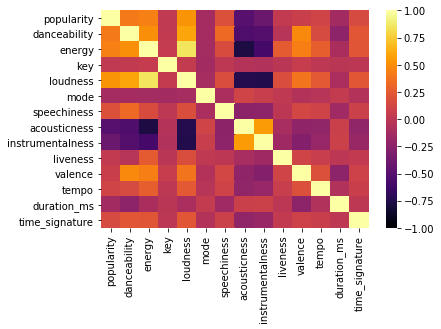

In [4]:
# Use Seaborn to visualize correlations
sns.heatmap(data.corr(), cmap='inferno', vmin=-1, vmax=1)
plt.show()

# Data Wrangling
This approach is to cluster the individul entries.

ISSUE 
The non-numeric columns 'artist_name' & 'track_name'are key attributes, however these cannot be processed by the DBSCAN algorithm. To avoid this, the two columns will be dropped.

In [5]:
num_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [6]:
X = data[num_cols]
display(X)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_id,,,,,,,,,,,,,,
2b8fOow8UzyDFAE27YhOZM,100,0.764,0.3200,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.5750,91.019,189486,4
21jGcNKet2qwijlDFuPiPb,99,0.695,0.7620,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,215280,4
3eekarcy7kvN4yt5ZFzltW,98,0.598,0.4270,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,4
3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.2250,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,245426,4
2XU0oxnq2qxCpomAAuJY8K,98,0.824,0.5880,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
038gsZG1ObZUtFMkwIJnqH,0,0.311,0.0758,6,-24.592,1,0.0357,0.7680,0.004250,0.0699,0.1690,84.039,117400,4
02UfNUoxphQFSLYQnSzqhM,0,0.267,0.2860,1,-17.582,1,0.0500,0.8880,0.692000,0.0620,0.6040,84.736,356987,4
024szQC1tsQq6UFemGBzo0,0,0.603,0.4890,9,-9.564,1,0.0381,0.9240,0.033100,0.1490,0.7880,89.147,203274,4


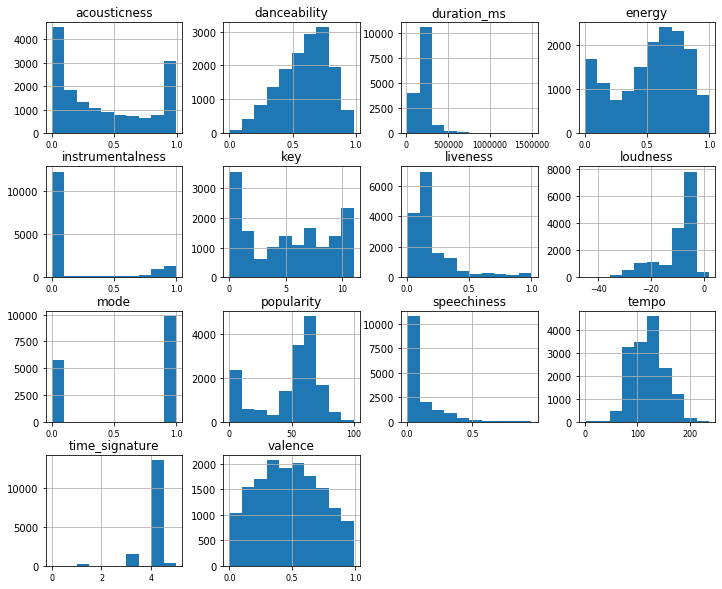

In [7]:
# For clarity the columns will be displayed as a histogram
X.hist(xlabelsize=8, figsize=(12,10));

# Encoding

From the table it is clear that the value ranges of the columns: popularity, key, loudness, tempo, duration_ms and time_signature exceeding 0 and 1.
These columns therefore need to be scaled.

In [8]:
# Define the columns requiring scaling
scale_col = ['popularity', 'key', 'loudness', 'tempo', 'duration_ms', 'time_signature']

In [9]:
# Scaling
for col in [scale_col]:
    X[col] = ((X[col] - X[col].min()) / (X[col].max() - X[col].min()))


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


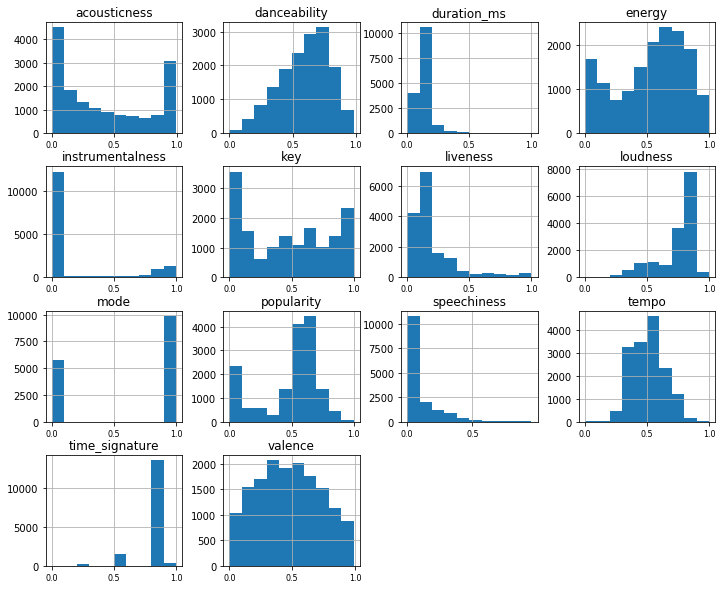

In [10]:
# Using the histogram, check that the scaling has worked
X.hist(xlabelsize=8, figsize=(12,10));

Conclusion: Yes, the scaling worked - all values range between 0 and 1. No progress to Clustering

# Clustering

In [11]:
# These are the parameter settings from the documentation: 
# class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

# Following multiple cases of unexpected termination due to Gateway Timeout, dead kernel and other issues, the hyperparameter search has been split into multiple small blocks.

In [12]:
%%time
#Take 1
print('Running a series of DBSCANs to find the best fitting parameters - eps between 0.1 and 0.4.')

clusters_last = []
for EPS in np.arange(0.1, 0.41, 0.1):
  for Min_Samples in range(3, 21):   # range of values for minimum number of samples - between 3 and 20
    dbscan = DBSCAN(eps=EPS, min_samples=Min_Samples)
    pred_dbscan = dbscan.fit_predict(X)

    clusters_this = [*zip(*np.unique(pred_dbscan, return_counts=True))]
    if (clusters_this == clusters_last): print(end='.')
    else: clusters_last = clusters_this; \
      print(f'\nDBSCAN(eps={dbscan.eps:0.1f}, min_samples={dbscan.min_samples:2}):',
        f'Found {max(pred_dbscan) + 1 :2} cluster' + ('s,' if max(pred_dbscan) else ', '),
        f'noise={len(pred_dbscan[pred_dbscan==-1]) / len(X) :6.2%},',
          'cluster_sizes=', clusters_this, end='')

Running a series of DBSCANs to find the best fitting parameters - eps between 0.1 and 0.4.

DBSCAN(eps=0.1, min_samples= 3): Found 12 clusters, noise=99.76%, cluster_sizes= [(-1, 15588), (0, 3), (1, 3), (2, 4), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 4)]
DBSCAN(eps=0.1, min_samples= 4): Found  1 cluster,  noise=99.97%, cluster_sizes= [(-1, 15622), (0, 4)]
DBSCAN(eps=0.1, min_samples= 5): Found  0 clusters, noise=100.00%, cluster_sizes= [(-1, 15626)]...............
DBSCAN(eps=0.2, min_samples= 3): Found 308 clusters, noise=58.55%, cluster_sizes= [(-1, 9149), (0, 4), (1, 1554), (2, 2937), (3, 6), (4, 14), (5, 3), (6, 14), (7, 13), (8, 4), (9, 4), (10, 3), (11, 3), (12, 4), (13, 4), (14, 4), (15, 3), (16, 3), (17, 4), (18, 4), (19, 3), (20, 3), (21, 4), (22, 3), (23, 4), (24, 5), (25, 6), (26, 3), (27, 3), (28, 3), (29, 7), (30, 3), (31, 3), (32, 4), (33, 3), (34, 8), (35, 202), (36, 3), (37, 3), (38, 5), (39, 4), (40, 3), (41, 3), (42, 4), (43, 10), (44, 4),

In [13]:
%%time
#Take 2
print('Running a series of DBSCANs to find the best fitting parameters - eps between 0.5 and 0.8.')

clusters_last = []
for EPS in np.arange(0.5, 0.81, 0.1):
  for Min_Samples in range(3, 21):   # range of values for minimum number of samples - between 3 and 20
    dbscan = DBSCAN(eps=EPS, min_samples=Min_Samples)
    pred_dbscan = dbscan.fit_predict(X)

    clusters_this = [*zip(*np.unique(pred_dbscan, return_counts=True))]
    if (clusters_this == clusters_last): print(end='.')
    else: clusters_last = clusters_this; \
      print(f'\nDBSCAN(eps={dbscan.eps:0.1f}, min_samples={dbscan.min_samples:2}):',
        f'Found {max(pred_dbscan) + 1 :2} cluster' + ('s,' if max(pred_dbscan) else ', '),
        f'noise={len(pred_dbscan[pred_dbscan==-1]) / len(X) :6.2%},',
          'cluster_sizes=', clusters_this, end='')

Running a series of DBSCANs to find the best fitting parameters - eps between 0.5 and 0.8.

DBSCAN(eps=0.5, min_samples= 3): Found 13 clusters, noise= 0.88%, cluster_sizes= [(-1, 137), (0, 9802), (1, 5645), (2, 6), (3, 3), (4, 3), (5, 3), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 3), (12, 3)]
DBSCAN(eps=0.5, min_samples= 4): Found  5 clusters, noise= 1.08%, cluster_sizes= [(-1, 168), (0, 9799), (1, 5644), (2, 6), (3, 5), (4, 4)]
DBSCAN(eps=0.5, min_samples= 5): Found  2 clusters, noise= 1.22%, cluster_sizes= [(-1, 191), (0, 9797), (1, 5638)]
DBSCAN(eps=0.5, min_samples= 6): Found  2 clusters, noise= 1.29%, cluster_sizes= [(-1, 201), (0, 9791), (1, 5634)]
DBSCAN(eps=0.5, min_samples= 7): Found  2 clusters, noise= 1.34%, cluster_sizes= [(-1, 210), (0, 9787), (1, 5629)]
DBSCAN(eps=0.5, min_samples= 8): Found  2 clusters, noise= 1.43%, cluster_sizes= [(-1, 223), (0, 9776), (1, 5627)]
DBSCAN(eps=0.5, min_samples= 9): Found  2 clusters, noise= 1.47%, cluster_sizes= [(-1, 230), (0, 9774),

In [14]:
%%time
#Take 3
print('Running a series of DBSCANs to find the best fitting parameters - eps between 0.9 and 1.1.')

clusters_last = []
for EPS in np.arange(0.9, 1.11, 0.1):
  for Min_Samples in range(3, 21):   # range of values for minimum number of samples - between 3 and 20
    dbscan = DBSCAN(eps=EPS, min_samples=Min_Samples)
    pred_dbscan = dbscan.fit_predict(X)

    clusters_this = [*zip(*np.unique(pred_dbscan, return_counts=True))]
    if (clusters_this == clusters_last): print(end='.')
    else: clusters_last = clusters_this; \
      print(f'\nDBSCAN(eps={dbscan.eps:0.1f}, min_samples={dbscan.min_samples:2}):',
        f'Found {max(pred_dbscan) + 1 :2} cluster' + ('s,' if max(pred_dbscan) else ', '),
        f'noise={len(pred_dbscan[pred_dbscan==-1]) / len(X) :6.2%},',
          'cluster_sizes=', clusters_this, end='')

Running a series of DBSCANs to find the best fitting parameters - eps between 0.9 and 1.1.

DBSCAN(eps=0.9, min_samples= 3): Found  2 clusters, noise= 0.01%, cluster_sizes= [(-1, 1), (0, 9895), (1, 5730)]...
DBSCAN(eps=0.9, min_samples= 7): Found  2 clusters, noise= 0.01%, cluster_sizes= [(-1, 2), (0, 9894), (1, 5730)].
DBSCAN(eps=0.9, min_samples= 9): Found  2 clusters, noise= 0.03%, cluster_sizes= [(-1, 5), (0, 9891), (1, 5730)]..
DBSCAN(eps=0.9, min_samples=12): Found  2 clusters, noise= 0.04%, cluster_sizes= [(-1, 6), (0, 9891), (1, 5729)]........
DBSCAN(eps=1.0, min_samples= 3): Found  2 clusters, noise= 0.00%, cluster_sizes= [(0, 9895), (1, 5731)].................
DBSCAN(eps=1.1, min_samples= 3): Found  1 cluster,  noise= 0.00%, cluster_sizes= [(0, 15626)].................CPU times: user 8min 38s, sys: 13.7 s, total: 8min 51s
Wall time: 8min 52s


In [15]:
%%time
#Take 4
print('Running a series of DBSCANs to find the best fitting parameters - eps between 1.2 and 1.3.')

clusters_last = []
for EPS in np.arange(1.2, 1.31, 0.1):
  for Min_Samples in range(3, 21):   # range of values for minimum number of samples - between 3 and 20
    dbscan = DBSCAN(eps=EPS, min_samples=Min_Samples)
    pred_dbscan = dbscan.fit_predict(X)

    clusters_this = [*zip(*np.unique(pred_dbscan, return_counts=True))]
    if (clusters_this == clusters_last): print(end='.')
    else: clusters_last = clusters_this; \
      print(f'\nDBSCAN(eps={dbscan.eps:0.1f}, min_samples={dbscan.min_samples:2}):',
        f'Found {max(pred_dbscan) + 1 :2} cluster' + ('s,' if max(pred_dbscan) else ', '),
        f'noise={len(pred_dbscan[pred_dbscan==-1]) / len(X) :6.2%},',
          'cluster_sizes=', clusters_this, end='')

Running a series of DBSCANs to find the best fitting parameters - eps between 1.2 and 1.3.

DBSCAN(eps=1.2, min_samples= 3): Found  1 cluster,  noise= 0.00%, cluster_sizes= [(0, 15626)]...................................CPU times: user 8min 43s, sys: 24 s, total: 9min 6s
Wall time: 9min 6s


## Findings: ...

In [16]:
# Advice on limits of K-means and hierarchical
#the main disadvantages of partitioning and hierarchical methods are: handling noise and getting bad results with finding clusters of nonspherical shape.

In [17]:
# Advice on selecting parameters for DBScan:
#""...
#According to a research made in 2017 by Schubert, Sander, et al, the desirable amount of noise will usually be between 1% and 30%. 
#Another insight from that research is that if one of the clusters contains many (20%-50%) points of the dataset, 
#it indicates that you should choose a smaller value for ε or to try another clustering method.
#..." source: Amit Shreiber, A Practical Guide to DBSCAN Method,  https://towardsdatascience.com/a-practical-guide-to-dbscan-method-d4ec5ab2bc99